# Linear, Ridge, and LASSO Regression Models
This notebook shows examples of models for training and predicting production with three different regression types

Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st                                    
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score    # specific measures to check our models


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


Read in the .csv data, then see the size of it

In [2]:
data = pd.read_csv('unconv_MV_v5.csv')
data.shape

(200, 8)

In [3]:
#want to use a random 80% of the data for training data and 20% for testing data
data_train = data.sample(n=160)
#data_train.head()
#data_train.sort_values(by='Well', ascending=True)

#taking the rest of the data for testing -- this method makes the training and testing data mutually exclusive
data_test = data[~data.isin(data_train)].dropna(how = 'all')
data_test.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
1,2.0,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
14,15.0,13.83,5.26,2.51,66.22,0.18,1.64,4323.568513
21,22.0,16.32,4.06,2.41,46.78,1.21,1.72,4771.307836
23,24.0,10.03,1.88,3.29,37.74,0.38,1.70,2515.440716
28,29.0,12.38,2.18,4.09,31.40,0.72,2.07,2760.485982


### Building and predicting with Linear Regression:

In [101]:
#building the linear regression model with training data
lin_reg = LinearRegression().fit(data_train[['Por','Perm','AI','Brittle','TOC','VR']],data_train['Prod'])
lin_reg.score(data_train[['Por','Perm','AI','Brittle','TOC','VR']],data_train['Prod'])
#lin_reg.coef_

0.9598934495716681

In [102]:
#making predictions with the testing data
lm_pred = lin_reg.predict(data_test[['Por','Perm','AI','Brittle','TOC','VR']])


In [103]:
#adding this to the dataframe from easy visualization
data_test['Linear'] = lm_pred

In [104]:
data_test.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,Linear,Ridge,LASSO
1,2.0,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,3414.739174,3449.997544,3441.527497
14,15.0,13.83,5.26,2.51,66.22,0.18,1.64,4323.568513,4623.553505,4548.196411,4561.598175
21,22.0,16.32,4.06,2.41,46.78,1.21,1.72,4771.307836,4539.589291,4568.316100,4559.680810
23,24.0,10.03,1.88,3.29,37.74,0.38,1.70,2515.440716,2346.376236,2355.037751,2352.465413
28,29.0,12.38,2.18,4.09,31.40,0.72,2.07,2760.485982,2698.417152,2764.979518,2750.342936


In [105]:
#showing how much variance is explained by the linear regression model
print('Variance explained: %.3f' % r2_score(data_test['Prod'].values, data_test['Linear'].values))


Variance explained: 0.957


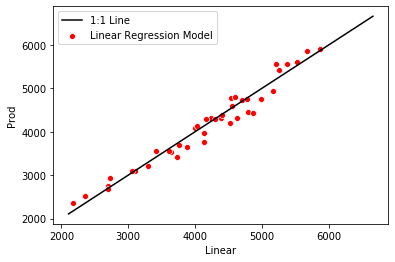

In [106]:
#visualizing the predictions vs actual for the testing data
plt.subplot(111)
sns.scatterplot(data_test['Linear'],data_test['Prod'], color = 'red')
x = np.linspace(start = np.min(data['Prod']),stop = np.max(data['Prod']), num = 1000)
y = x
plt.plot(x,y,color='black')
plt.legend(['1:1 Line','Linear Regression Model'])

### Building and predicting with Ridge Regression:

In [113]:
#ridge regression model building
lam = 0.7           #lambda is the shrinkage parameter -- is tuned to have model best explain variance
ridge_reg = Ridge(alpha=lam).fit(data_train[['Por','Perm','AI','Brittle','TOC','VR']],data_train['Prod'])
ridge_reg.score(data_train[['Por','Perm','AI','Brittle','TOC','VR']],data_train['Prod'])


0.9590381249798039

In [114]:
#rdige regression prediciton and addition to dataframe
ri_pred = ridge_reg.predict(data_test[['Por','Perm','AI','Brittle','TOC','VR']])
data_test['Ridge'] = ri_pred

In [115]:
#variance explained by ridge regression model
print('Variance explained: %.3f' % r2_score(data_test['Prod'].values, data_test['Ridge'].values))


Variance explained: 0.959


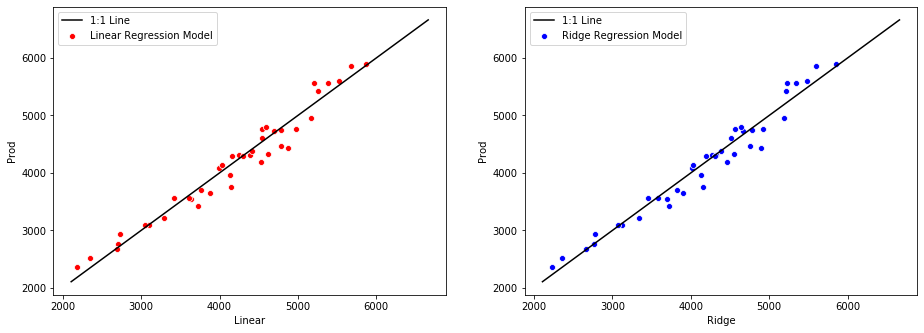

In [116]:
#plotting both to compare
plt.subplot(121)
sns.scatterplot(data_test['Linear'],data_test['Prod'], color = 'red')
x = np.linspace(start = np.min(data['Prod']),stop = np.max(data['Prod']), num = 1000)
y = x
plt.plot(x,y,color='black')
plt.legend(['1:1 Line','Linear Regression Model'])

plt.subplot(122)
sns.scatterplot(data_test['Ridge'],data_test['Prod'], color = 'blue')
x = np.linspace(start = np.min(data['Prod']),stop = np.max(data['Prod']), num = 1000)
y = x
plt.plot(x,y,color='black')
plt.legend(['1:1 Line','Ridge Regression Model'])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

### Building and predicting with LASSO Regression:

In [107]:
#LASSO regression
lam_la = 1.3       #lambda tuned to maximize variance explained in the model
lasso_reg = Lasso(alpha=lam_la).fit(data_train[['Por','Perm','AI','Brittle','TOC','VR']],data_train['Prod'])
lasso_reg.score(data_train[['Por','Perm','AI','Brittle','TOC','VR']],data_train['Prod'])


0.9594386753667359

In [96]:
#predicting production values with LASSO based on testing data
la_pred = lasso_reg.predict(data_test[['Por','Perm','AI','Brittle','TOC','VR']])
data_test['LASSO'] = la_pred         #adding to dataframe to compare

In [97]:
#explaining variance -- used to tune lambda
print('Variance explained: %.3f' % r2_score(data_test['Prod'].values, data_test['LASSO'].values))


Variance explained: 0.959


### Visualizing all the models with actual production values, and comparing to 1:1 line
The 1:1 line shows how far off the model prediction is from the actual value. The closer to the line, the closer the prediction is. Below the lines means the model is underpredicting production, and above means overpredicting.

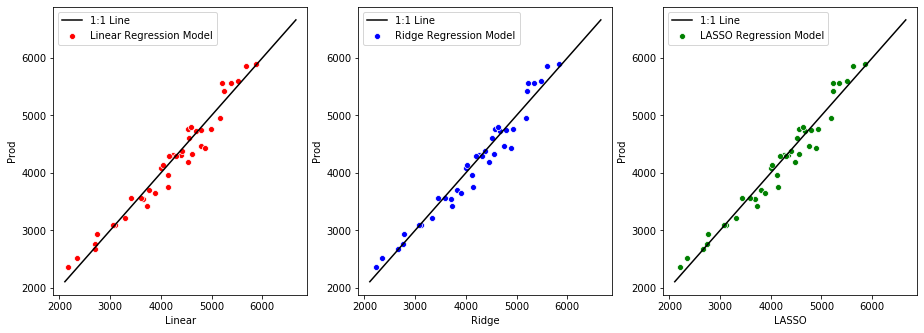

In [108]:
#visualizing all of the models with the actual production values, and comparing to 1:1 line
plt.subplot(131)
sns.scatterplot(data_test['Linear'],data_test['Prod'], color = 'red')
x = np.linspace(start = np.min(data['Prod']),stop = np.max(data['Prod']), num = 1000)
y = x
plt.plot(x,y,color='black')
plt.legend(['1:1 Line','Linear Regression Model'])

plt.subplot(132)
sns.scatterplot(data_test['Ridge'],data_test['Prod'], color = 'blue')
x = np.linspace(start = np.min(data['Prod']),stop = np.max(data['Prod']), num = 1000)
y = x
plt.plot(x,y,color='black')
plt.legend(['1:1 Line','Ridge Regression Model'])


plt.subplot(133)
sns.scatterplot(data_test['LASSO'],data_test['Prod'], color = 'green')
x = np.linspace(start = np.min(data['Prod']),stop = np.max(data['Prod']), num = 1000)
y = x
plt.plot(x,y,color='black')
plt.legend(['1:1 Line','LASSO Regression Model'])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)

In [109]:
data_test.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod,Linear,Ridge,LASSO
1,2.0,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205,3414.739174,3449.997544,3441.527497
14,15.0,13.83,5.26,2.51,66.22,0.18,1.64,4323.568513,4623.553505,4548.196411,4561.598175
21,22.0,16.32,4.06,2.41,46.78,1.21,1.72,4771.307836,4539.589291,4568.316100,4559.680810
23,24.0,10.03,1.88,3.29,37.74,0.38,1.70,2515.440716,2346.376236,2355.037751,2352.465413
28,29.0,12.38,2.18,4.09,31.40,0.72,2.07,2760.485982,2698.417152,2764.979518,2750.342936


# Executive Summary:
The challenge was to create a model to predict production using porosity, permeability, brittleness, acoustic impedance, total organic carbon, and VR. This was done by creating a linear regression model, a ridge regression model, and a LASSO regression model. The variance explained was the same for all of the models after tuning the shrinkage parameter, and showed that the models perform very well (although on average, slightly below actual production). The recommendation is to use the linear regression model since the results are consistent throughout and this is the simplest (and therefore most computationally inexpensive) model.